## Analysis Plan 

### Understand the Dataset:
- Load the dataset  and explore its structure and content.
- Check for missing values, outliers, and any data preprocessing requirements.

### Define Key Metrics:
- Identify the key performance indicators (KPIs) relevant to the campaign, such as the number of rides, cost per ride (CPA), and cost per thousand impressions (CPM).

### Benchmarking:
- Compare industry benchmarks for CPA and CPM with the suggested benchmarks from TweetX.
- Use this information to set realistic targets for the campaign.

### Budget Estimation:
- Based on the industry benchmarks and the suggested measurement design, estimate the budget required for the campaign.
- Consider factors like the number of impressions needed, expected click-through rates, and conversion rates.

### ROI Analysis:
- Calculate the potential return on investment (ROI) by estimating the revenue generated from the expected increase in rides and comparing it to the campaign cost.

### Spatial Analysis:
- Analyze the dataset for different cities to identify potential target locations for the TweetX campaign. Consider launching in cities where Bolt has a strong presence or high growth potential.

### Temporal Analysis:
- Explore the dataset over time to identify patterns and trends. Consider seasonality and other temporal factors that might influence the success of the campaign.

### Sensitivity Analysis:
- Perform sensitivity analysis on key variables, such as CPA, CPM, and the budget. Assess how changes in these variables impact the overall success of the campaign.

### Recommendations and Summary:
- Provide clear recommendations based on the analysis, including the suggested budget, measurement design, and potential impact on Bolt's growth in Poland.
- Summarize key findings for stakeholders, ensuring clarity for both data analytics experts and non-experts.

### Additional Assumptions:
#### Assumptions on Conversion Rates:
- Make assumptions about the conversion rates from impressions to rides based on industry standards or any available data.

#### Assumptions on User Behavior:
- If data on user behavior is not provided, make assumptions about how users might respond to the TweetX campaign.

#### Answer 
1) What’s the best way to measure the impact of the campaign? What would be a good data-driven framework?
2) What minimal budget should the campaign have, so that we are able to measure its impact afterwards?
3) What would be the suggested measurement design that the advertising team should follow?


Assumptions:
Conversion Rate Assumption:

We assume a conversion rate of 5%, meaning 5% of impressions result in actual rides.

CPM and CPA Assumptions:
We'll use the provided benchmarks by TweetX for CPM (2€ to 4€) and CPA (6€ to 12€).

Budget Allocation Assumption:
Allocate the budget based on the expected number of impressions needed and the CPM rate.

In [1]:
import sys
from src.data.datafunctions import  DataFunctions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





#instances 
data_class = DataFunctions()

In [2]:
#load config file
df = data_class.read_data()

In [3]:
df.head()

,Warsaw,Czestochowa,Kielce,Lublin,Bydgoszcz,Katowice,Wroclaw,Rzeszow,Poznan,Szczecin,Krakow,Gdansk,Zabrze
date,,,,,,,,,,,,,
2022-01-01,2074,256,196,212,641,0,168,23,1436,406,501,1716,387
2022-01-02,660,84,123,70,237,0,42,17,765,81,181,562,127
2022-01-03,520,86,176,57,240,0,43,13,748,92,185,579,148
2022-01-04,460,107,140,57,252,0,53,14,657,119,184,560,171
2022-01-05,449,102,161,82,316,0,47,12,666,138,241,762,207


<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2022-01-01 to 2023-09-18
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Warsaw       626 non-null    int64
 1   Czestochowa  626 non-null    int64
 2   Kielce       626 non-null    int64
 3   Lublin       626 non-null    int64
 4   Bydgoszcz    626 non-null    int64
 5   Katowice     626 non-null    int64
 6   Wroclaw      626 non-null    int64
 7   Rzeszow      626 non-null    int64
 8   Poznan       626 non-null    int64
 9   Szczecin     626 non-null    int64
 10  Krakow       626 non-null    int64
 11  Gdansk       626 non-null    int64
 12  Zabrze       626 non-null    int64
dtypes: int64(13)
memory usage: 68.5+ KB
None
            Warsaw  Czestochowa  Kielce  Lublin  Bydgoszcz  Katowice  Wroclaw  \
date                                                                            
2022-01-01    2074          256     196     212        641         0      16

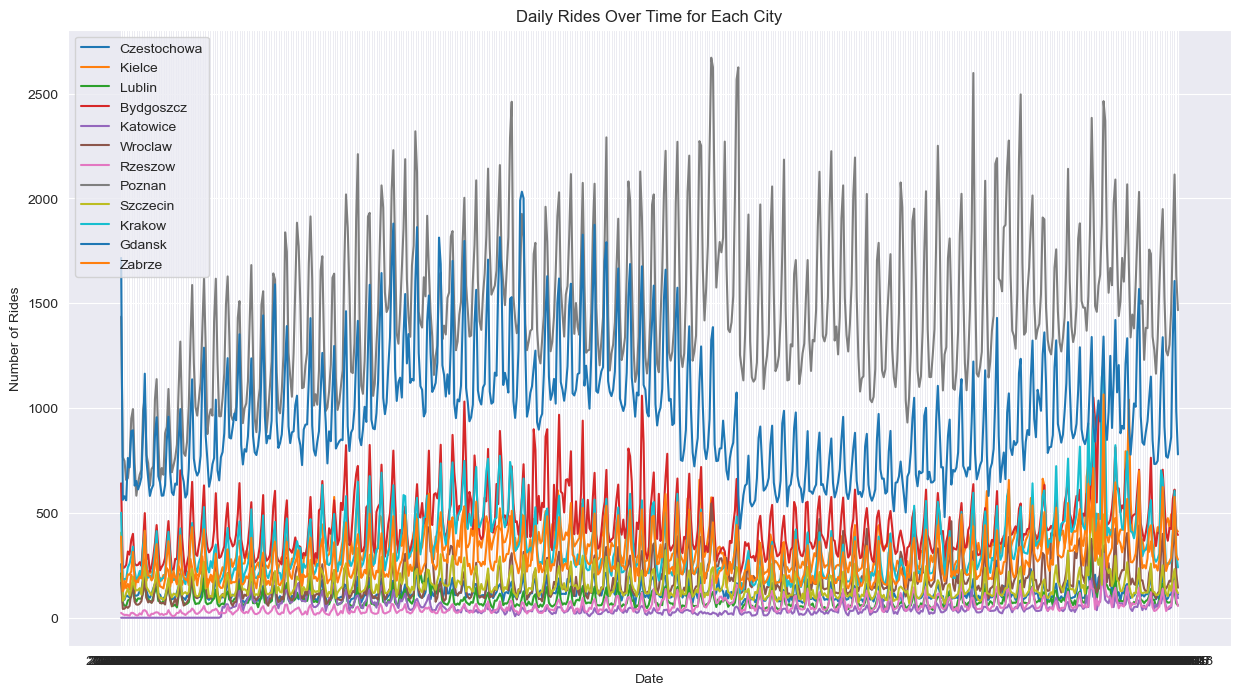

In [4]:
print(df.info())
print(df.head())

# Visualize rides over time for each city
plt.figure(figsize=(15, 8))
for city in df.columns[1:]:
    sns.lineplot(x='date', y=city, data=df, label=city)
plt.title('Daily Rides Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

In [5]:
# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12

# Calculate the budget range
impressions_needed = df.sum().sum()  # Total impressions for all cities
budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression
budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides
expected_rides_low = impressions_needed * (cpa_low / 100) * 0.10  # Assuming a 10% conversion rate
expected_rides_high = impressions_needed * (cpa_high / 100) * 0.10  # Assuming a 10% conversion rate

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")
print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")


Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 21211.96 - 42423.92


In [6]:
#ROI Analysis


# Assuming the average profit per ride is 6€
average_profit_per_ride = 6
expected_revenue_low = expected_rides_low * average_profit_per_ride
expected_revenue_high = expected_rides_high * average_profit_per_ride

roi_low = (expected_revenue_low - budget_high) / budget_high * 100
roi_high = (expected_revenue_high - budget_low) / budget_low * 100

print(f"Expected Revenue Range: {expected_revenue_low:.2f}€ - {expected_revenue_high:.2f}€")
print(f"ROI Range: {roi_low:.2f}% - {roi_high:.2f}%")


Expected Revenue Range: 127271.77€ - 254543.54€
ROI Range: 800.00% - 3500.00%


In [7]:
#take 2 

In [8]:
# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * df.sum().sum()  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")


Minimum budget for a measurable impact: 31817943.00 €


In [9]:
# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * df.sum().sum()  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")


Minimum budget for a measurable impact: 31817943.00 €


In [10]:
#take 3 

In [20]:
df[df.index]

KeyError: "None of [Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',\n       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',\n       ...\n       '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',\n       '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18'],\n      dtype='object', name='date', length=626)] are in the [columns]"

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2022-01-01 to 2023-09-18
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Warsaw       626 non-null    int64
 1   Czestochowa  626 non-null    int64
 2   Kielce       626 non-null    int64
 3   Lublin       626 non-null    int64
 4   Bydgoszcz    626 non-null    int64
 5   Katowice     626 non-null    int64
 6   Wroclaw      626 non-null    int64
 7   Rzeszow      626 non-null    int64
 8   Poznan       626 non-null    int64
 9   Szczecin     626 non-null    int64
 10  Krakow       626 non-null    int64
 11  Gdansk       626 non-null    int64
 12  Zabrze       626 non-null    int64
dtypes: int64(13)
memory usage: 84.6+ KB
None
            Warsaw  Czestochowa  Kielce  Lublin  Bydgoszcz  Katowice  Wroclaw  \
date                                                                            
2022-01-01    2074          256     196     212        641         0      16

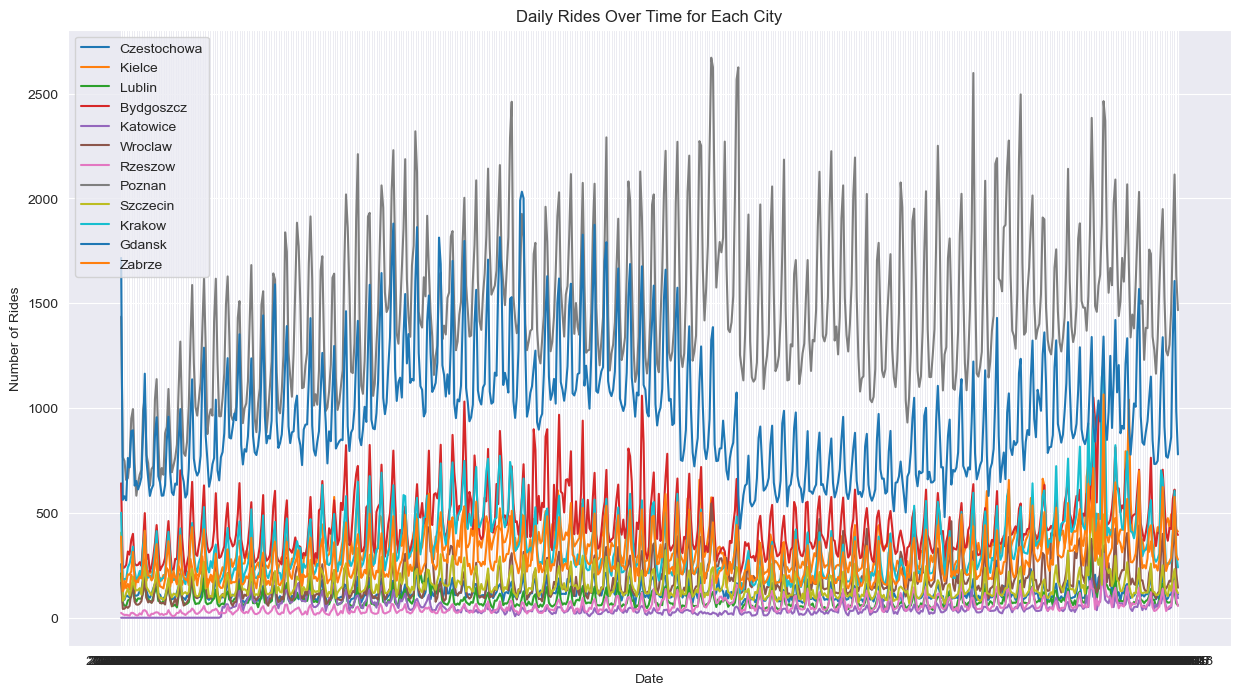

Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 21211.96 - 42423.92
Expected Revenue Range: 127271.77€ - 254543.54€
ROI Range: 800.00% - 3500.00%
Minimum budget for a measurable impact: 31817943.00 €


In [21]:

# Check the structure and content
print(df.info())
print(df.head())

# Visualize rides over time for each city
plt.figure(figsize=(15, 8))
for city in df.columns[1:]:
    plt.plot(df.index, df[city], label=city)
plt.title('Daily Rides Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

# Calculate the total rides for all cities
total_rides = df.sum().sum()

# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12

# Calculate the budget range
impressions_needed = total_rides  # Total impressions for all cities
budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression
budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides
expected_rides_low = impressions_needed * (cpa_low / 100) * 0.10  # Assuming a 10% conversion rate
expected_rides_high = impressions_needed * (cpa_high / 100) * 0.10  # Assuming a 10% conversion rate

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")
print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")

# Assuming the average profit per ride is 6€
average_profit_per_ride = 6
expected_revenue_low = expected_rides_low * average_profit_per_ride
expected_revenue_high = expected_rides_high * average_profit_per_ride

roi_low = (expected_revenue_low - budget_high) / budget_high * 100
roi_high = (expected_revenue_high - budget_low) / budget_low * 100

print(f"Expected Revenue Range: {expected_revenue_low:.2f}€ - {expected_revenue_high:.2f}€")
print(f"ROI Range: {roi_low:.2f}% - {roi_high:.2f}%")

# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * total_rides  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")